# 多标签线性回归 (Multivariate Linear Regression)

## 理论推导

### 模型定义
对于有 `m` 个样本、`n` 个特征的输入矩阵 <code>X ∈ ℝ<sup>m×n</sup></code>
预测 `k` 个标签的输出矩阵 <code>Ŷ ∈ ℝ<sup>m×k</sup></code>：

$$
\hat{Y} = X \cdot W + b
$$

其中：
- <code>W ∈ ℝ<sup>n×k</sup></code> 为权重矩阵
- <code>b ∈ ℝ<sup>k</sup></code> 为偏置向量

### 损失函数（MSE）
均方误差损失函数：
$$
\mathcal{L} = \frac{1}{2m}\sum_{i=1}^m \sum_{j=1}^k (\hat{y}^{(i)}_j - y^{(i)}_j)^2 
$$
（除以2是为了求导更方便）

### 梯度下降参数更新
**权重梯度**：
$$
\frac{\partial \mathcal{L}}{\partial W} = \frac{1}{m} X^T \cdot (\hat{Y} - Y)
$$

**偏置梯度**：
$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}^{(i)} - y^{(i)})
$$

参数更新：
$$
\begin{aligned}
W &:= W - α \cdot \frac{\partial \mathcal{L}}{\partial W} \\
b &:= b - α \cdot \frac{\partial \mathcal{L}}{\partial b}
\end{aligned}
$$

---


In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
class MultivariateLinearRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
        self.loss_history = []  # 记录损失变化
    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_labels = y.shape[1]
        self.weights = np.random.randn(n_features, n_labels) * 0.01
        self.bias = np.zeros(n_labels)
        for _ in range(self.n_iter):
            y_pred = np.dot(X, self.weights) + self.bias
            loss = np.mean((y_pred - y) ** 2) / 2
            self.loss_history.append(loss)
            error = y_pred - y
            dW = np.dot(X.T, error) / n_samples
            db = np.mean(error, axis=0)
            self.weights -= self.learning_rate * dW
            self.bias -= self.learning_rate * db
        return self
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    def plot_loss_history(self):
        """绘制训练损失变化曲线"""
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.n_iter), self.loss_history, color='royalblue')
        plt.title('Training Loss History')
        plt.xlabel('Iteration')
        plt.ylabel('Loss (MSE)')
        plt.grid(alpha=0.3)
        plt.show()
    def plot_predictions(self, X, y, label_index=0):
        """可视化单个标签的预测结果"""
        y_pred = self.predict(X)
        plt.figure(figsize=(10, 6))
        plt.scatter(y[:, label_index], y_pred[:, label_index], 
                   alpha=0.6, color='crimson', edgecolors='w')
        # 绘制理想对角线
        min_val = min(y.min(), y_pred.min())
        max_val = max(y.max(), y_pred.max())
        plt.plot([min_val, max_val], [min_val, max_val], 
                '--', color='gray', lw=1.5)
        plt.title(f'Label {label_index} - True vs Predicted Values')
        plt.xlabel('True Values')
        plt.ylabel('Predicted Values')
        plt.grid(alpha=0.3)
        plt.show()

In [74]:
# 生成更易可视化的带偏置数据
np.random.seed(42)
n_features = 3
n_labels = 2

In [75]:
# 生成具有线性可分性的数据
X = np.random.randn(200, n_features) * 2
print(X.shape)

(200, 3)


In [76]:
X[0:5]

array([[ 0.99342831, -0.2765286 ,  1.29537708],
       [ 3.04605971, -0.46830675, -0.46827391],
       [ 3.15842563,  1.53486946, -0.93894877],
       [ 1.08512009, -0.92683539, -0.93145951],
       [ 0.48392454, -3.82656049, -3.44983567]])

In [77]:
#true_weights = np.array([[3.0, -1.5], [-2.0, 0.8], [1.2, -0.3]]) # 真实权重
#true_bias = np.array([2.0, -1.0]) # 真实偏置
true_weights = np.array([[1, 1], [1, 1], [1, 1]]) # 真实权重
true_bias = np.array([1, 1]) # 真实偏置


In [78]:
# 添加带有不同量级的噪声
y = np.dot(X, true_weights) + true_bias
noise = np.hstack([
    np.random.randn(200, 1)*0.5,
    np.random.randn(200, 1)*1.0
])
y += noise

In [79]:
y.shape

(200, 2)

In [80]:
y[0:5]

array([[ 3.39077109,  3.95056059],
       [ 2.64839639,  2.59343432],
       [ 5.18914928,  4.85046709],
       [ 0.90464412, -0.23545009],
       [-5.58575416, -6.22696784]])

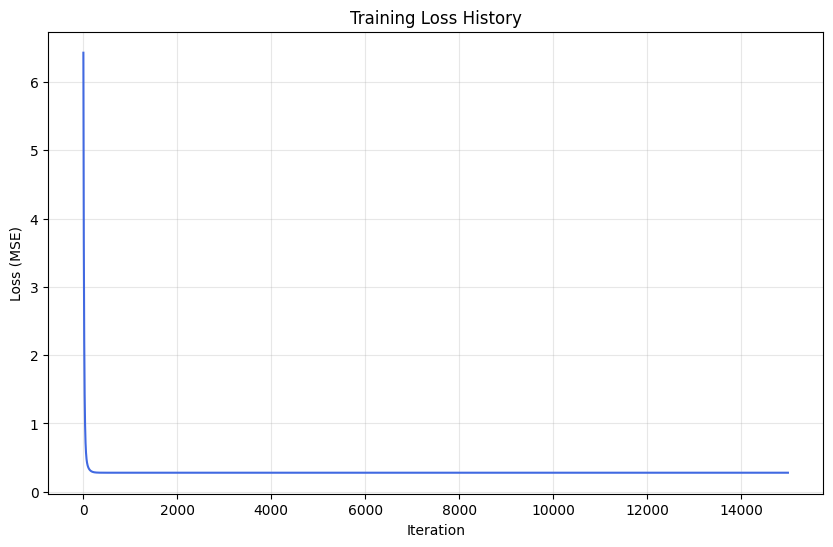

In [81]:
# 分割训练集
X_train, y_train = X[:180], y[:180]
X_test, y_test = X[180:], y[180:]
# 训练模型
model = MultivariateLinearRegression(learning_rate=0.01, n_iter=15000)
model.fit(X_train, y_train)
# 可视化训练过程
model.plot_loss_history()

In [82]:
model.weights

array([[0.99489805, 1.08005566],
       [1.02034243, 0.9909984 ],
       [1.03111942, 1.10874513]])

In [83]:
model.bias

array([1.00248254, 1.11952971])


Label 0 Evaluation:
True Weights: [1 1 1]
Learned Weights: [0.99489805 1.02034243 1.03111942]
True Bias: 1
Learned Bias: 1.0024825437184428


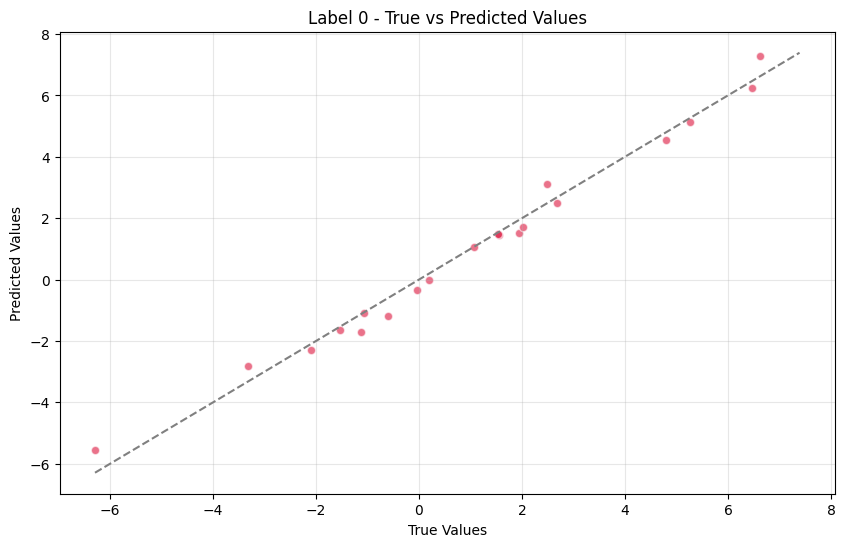


Label 1 Evaluation:
True Weights: [1 1 1]
Learned Weights: [1.08005566 0.9909984  1.10874513]
True Bias: 1
Learned Bias: 1.1195297065030783


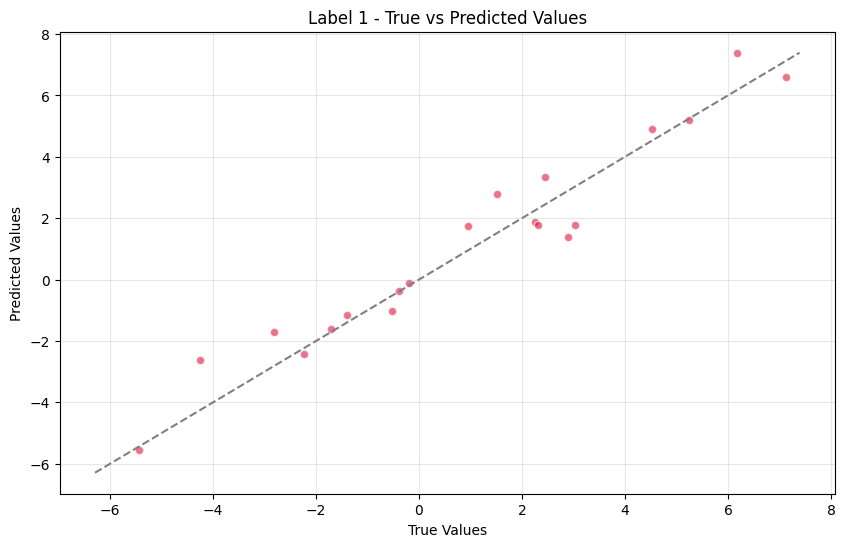

In [84]:
# 可视化各个标签的预测结果
for label in range(n_labels):
    print(f"\nLabel {label} Evaluation:") # 输出标签的评估结果
    print("True Weights:", true_weights[:, label]) # 输出真实权重
    print("Learned Weights:", model.weights[:, label]) # 输出学习到的权重
    print("True Bias:", true_bias[label]) # 输出真实偏置
    print("Learned Bias:", model.bias[label]) # 输出学习到的偏置
    model.plot_predictions(X_test, y_test, label_index=label) # 可视化预测结果